In [2]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import joblib

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")



# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

In [11]:
seq_len = 30
data_gan_AAPL = real_data_loading('high_frequency', seq_len, 'AAPL')
data_gan_NVDA = real_data_loading('high_frequency', seq_len, 'NVDA')
data_gan_ORCL = real_data_loading('high_frequency', seq_len, 'ORCL')

gan_AAPL = joblib.load('data/generated_data_AAPL')
gan_NVDA = joblib.load('data/generated_data_NVDA')
gan_ORCL = joblib.load('data/generated_data_ORCL')

In [18]:
decoded_base_AAPL = joblib.load('../../timevae/data/decoded_base_AAPL')
decoded_base_NVDA = joblib.load('../../timevae/data/decoded_base_NVDA')
decoded_base_ORCL = joblib.load('../../timevae/data/decoded_base_ORCL')

decoded_trend_AAPL = joblib.load('../../timevae/data/decoded_trend_AAPL')
decoded_trend_NVDA = joblib.load('../../timevae/data/decoded_trend_NVDA')
decoded_trend_ORCL = joblib.load('../../timevae/data/decoded_trend_ORCL')

prior_samples_base_AAPL = joblib.load('../../timevae/data/prior_samples_base_AAPL')
prior_samples_base_NVDA = joblib.load('../../timevae/data/prior_samples_base_NVDA')
prior_samples_base_ORCL = joblib.load('../../timevae/data/prior_samples_base_ORCL')

prior_samples_trend_AAPL = joblib.load('../../timevae/data/prior_samples_trend_AAPL')
prior_samples_trend_NVDA = joblib.load('../../timevae/data/prior_samples_trend_NVDA')
prior_samples_trend_ORCL = joblib.load('../../timevae/data/prior_samples_trend_ORCL')

data_vae_AAPL = joblib.load('../../timevae/data/data_vae_AAPL')
data_vae_NVDA = joblib.load('../../timevae/data/data_vae_NVDA')
data_vae_ORCL = joblib.load('../../timevae/data/data_vae_ORCL')

In [29]:
len(data_vae_AAPL), data_vae_AAPL[0].shape, len(data_gan_AAPL), data_gan_AAPL[0].shape

(43116, (30, 5), 43116, (30, 5))

## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [5]:
def disc_score(ori_data, generated_data, metric_iteration=5):
    discriminative_score = list()
    for _ in range(metric_iteration):
      temp_disc = discriminative_score_metrics(ori_data, generated_data)
      discriminative_score.append(temp_disc)
    print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [9]:
disc_score(data_gan_AAPL, gan_AAPL)

Discriminative score: 0.0692


In [10]:
disc_score(data_gan_NVDA, gan_NVDA)

Discriminative score: 0.2163


In [12]:
disc_score(data_gan_ORCL, gan_ORCL)

Discriminative score: 0.1692


In [13]:
disc_score(data_vae_AAPL, prior_samples_base_AAPL)

Discriminative score: 0.3048


In [14]:
disc_score(data_vae_AAPL, prior_samples_trend_AAPL)

Discriminative score: 0.2548


In [19]:
disc_score(data_vae_AAPL, decoded_base_AAPL)

Discriminative score: 0.1217


In [20]:
disc_score(data_vae_AAPL, decoded_trend_AAPL)

Discriminative score: 0.1087


In [15]:
disc_score(data_vae_NVDA, prior_samples_base_NVDA)

Discriminative score: 0.0504


In [16]:
disc_score(data_vae_NVDA, prior_samples_trend_NVDA)

Discriminative score: 0.0235


In [21]:
disc_score(data_vae_NVDA, decoded_base_NVDA)

Discriminative score: 0.0733


In [22]:
disc_score(data_vae_NVDA, decoded_trend_NVDA)

Discriminative score: 0.0553


In [23]:
disc_score(data_vae_ORCL, prior_samples_base_ORCL)

Discriminative score: 0.2073


In [24]:
disc_score(data_vae_ORCL, prior_samples_trend_ORCL)

Discriminative score: 0.1154


In [25]:
disc_score(data_vae_ORCL, decoded_base_ORCL)

Discriminative score: 0.1246


In [26]:
disc_score(data_vae_ORCL, decoded_trend_ORCL)

Discriminative score: 0.034


In [31]:
pd.DataFrame({'TimeGAN':[0.0692, 0.2163, 0.1692],\
              'TimeVAE_base':[0.3048, 0.0504, 0.2073],\
              'TimeVAE_trend':[0.2548, 0.0235, 0.1154],
              'TimeVAE_decoded_base': [0.1217, 0.0733, 0.1246],
              'TimeVAE_decoded_trend': [0.1087,0.0553,0.034]}, index = ['AAPL', "NVDA", 'ORCL'])

,TimeGAN,TimeVAE_base,TimeVAE_trend,TimeVAE_decoded_base,TimeVAE_decoded_trend
AAPL,0.0692,0.3048,0.2548,0.1217,0.1087
NVDA,0.2163,0.0504,0.0235,0.0733,0.0553
ORCL,0.1692,0.2073,0.1154,0.1246,0.0340


In [6]:
pd.DataFrame({'TimeGAN':[0.0156], 'TimeGAN_no_trend':[0.0386], 'TimeVAE_trend':[0.0568]}, index = ['AAPL'])

,TimeGAN,TimeGAN_no_trend,TimeVAE_trend
AAPL,0.0156,0.0386,0.0568


## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [33]:
predictive = {'TimeGAN': [], 'TimeVAE_base': [], 'TimeVAE_trend': [],\
              'TimeVAE_decoded_basce': [], 'TimeVAE_decoded_trend':[]}

def pred_score(ori_data, generated_data, metric_iteration = 5):
    predictive_score = list()
    for tt in range(metric_iteration):
      temp_pred = predictive_score_metrics(ori_data, generated_data)
      predictive_score.append(temp_pred)   
    print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))
    return np.round(np.mean(predictive_score), 4)

In [36]:
predictive['TimeGAN'].append(pred_score(data_gan_AAPL, gan_AAPL))

predictive['TimeGAN'].append(pred_score(data_gan_NVDA, gan_NVDA))

predictive['TimeGAN'].append(pred_score(data_gan_ORCL, gan_ORCL))

Predictive score: 0.0069
Predictive score: 0.014
Predictive score: 0.002


In [41]:
predictive['TimeVAE_base'].append(pred_score(data_vae_AAPL, prior_samples_base_AAPL))

predictive['TimeVAE_base'].append(pred_score(data_vae_NVDA, prior_samples_base_NVDA))

predictive['TimeVAE_base'].append(pred_score(data_vae_ORCL, prior_samples_base_ORCL))

Predictive score: 0.0074
Predictive score: 0.0123
Predictive score: 0.0019


In [42]:
predictive['TimeVAE_trend'].append(pred_score(data_vae_AAPL, prior_samples_trend_AAPL))

predictive['TimeVAE_trend'].append(pred_score(data_vae_NVDA, prior_samples_trend_NVDA))

predictive['TimeVAE_trend'].append(pred_score(data_vae_ORCL, prior_samples_trend_ORCL))

Predictive score: 0.0071
Predictive score: 0.012
Predictive score: 0.0026


In [43]:
predictive['TimeVAE_decoded_basce'].append(pred_score(data_vae_AAPL, decoded_base_AAPL))

predictive['TimeVAE_decoded_basce'].append(pred_score(data_vae_NVDA, decoded_base_NVDA))

predictive['TimeVAE_decoded_basce'].append(pred_score(data_vae_ORCL, decoded_base_ORCL))

Predictive score: 0.0075
Predictive score: 0.0123
Predictive score: 0.0018


In [44]:
predictive['TimeVAE_decoded_trend'].append(pred_score(data_vae_AAPL, decoded_trend_AAPL))

predictive['TimeVAE_decoded_trend'].append(pred_score(data_vae_NVDA, decoded_trend_NVDA))

predictive['TimeVAE_decoded_trend'].append(pred_score(data_vae_ORCL, decoded_trend_ORCL))

Predictive score: 0.007
Predictive score: 0.0118
Predictive score: 0.0025


In [45]:
# добавить pred_score(data_vae_AAPL, data_vae_AAPL)- чтоб понять какое качество если трейн сами эти данные

In [47]:
pred_score(data_vae_AAPL, data_vae_AAPL)

Predictive score: 0.0059


0.0059

In [48]:
pred_score(data_vae_NVDA, data_vae_NVDA)

Predictive score: 0.0113


0.0113

In [49]:
pred_score(data_vae_ORCL, data_vae_ORCL)

Predictive score: 0.0021


0.0021

In [51]:
predictive['real'] = [0.0059, 0.0113, 0.0021]

In [52]:
pd.DataFrame(predictive, index = ['AAPL', "NVDA", 'ORCL'])

,TimeGAN,TimeVAE_base,TimeVAE_trend,TimeVAE_decoded_basce,TimeVAE_decoded_trend,real
AAPL,0.0069,0.0074,0.0071,0.0075,0.0070,0.0059
NVDA,0.0140,0.0123,0.0120,0.0123,0.0118,0.0113
ORCL,0.0020,0.0019,0.0026,0.0018,0.0025,0.0021


## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

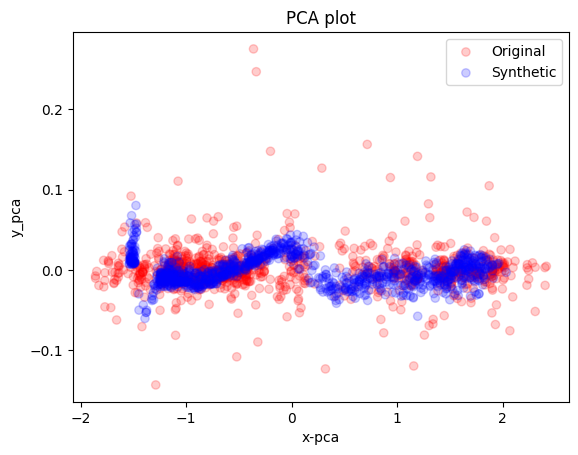

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.152s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.028014
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.880779
[t-SNE] KL divergence after 300 iterations: 0.576083


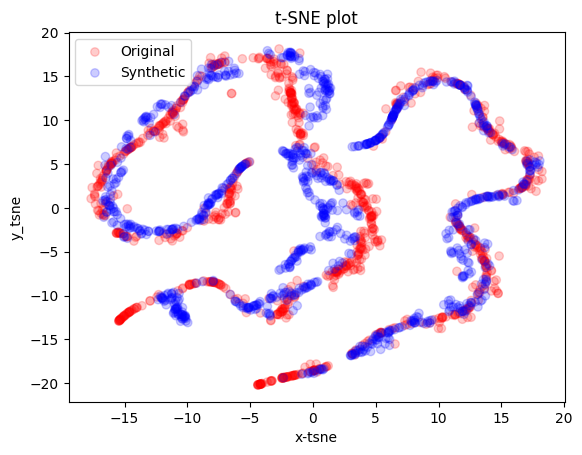

In [53]:
visualization(data_gan_AAPL, gan_AAPL, 'pca')
visualization(data_gan_AAPL, gan_AAPL, 'tsne')

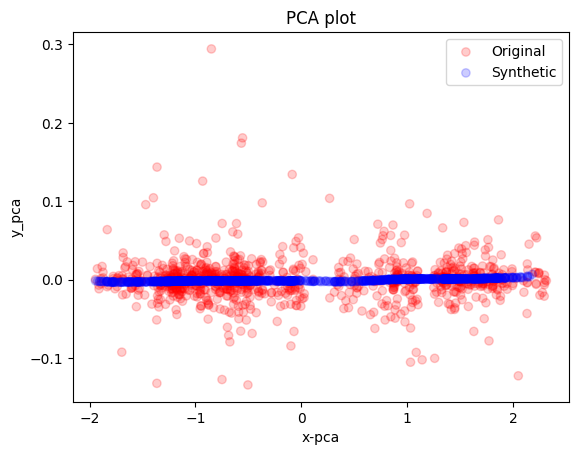

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.148s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.022933
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.744633
[t-SNE] KL divergence after 300 iterations: 0.478079


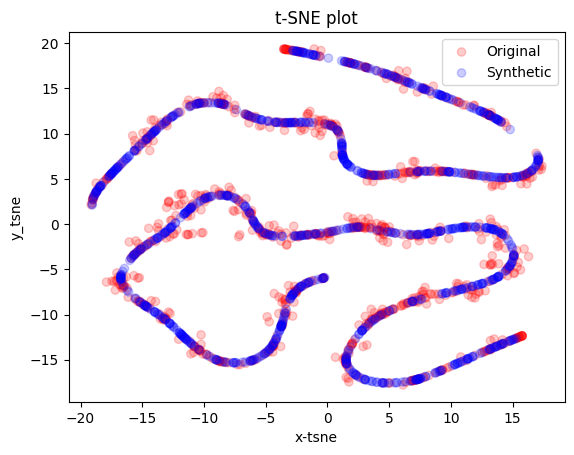

In [56]:
visualization(data_vae_AAPL, prior_samples_base_AAPL, 'pca')
visualization(data_vae_AAPL, prior_samples_base_AAPL, 'tsne')

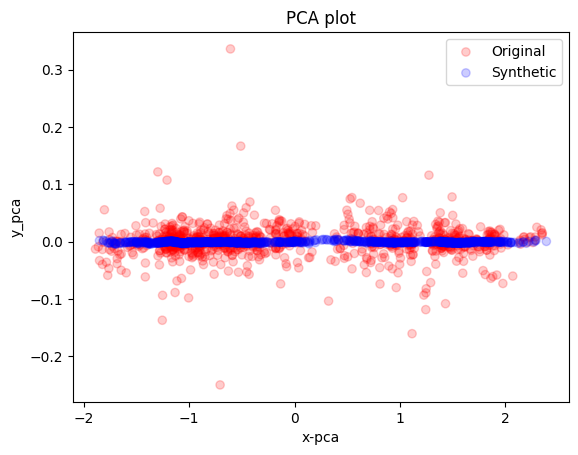

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.162s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.022027
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.177277
[t-SNE] KL divergence after 300 iterations: 0.481807


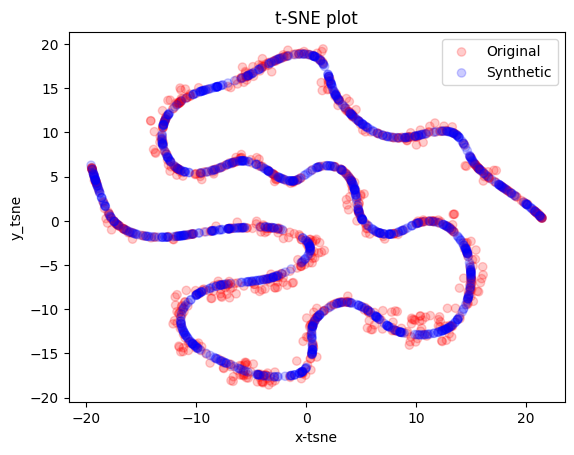

In [57]:
visualization(data_vae_AAPL, prior_samples_trend_AAPL, 'pca')
visualization(data_vae_AAPL, prior_samples_trend_AAPL, 'tsne')